In [1]:
using Plots, LaTeXStrings
using Plots.PlotMeasures
empty!(ARGS)
push!(ARGS, "G:/Hamburg/b30.0_mu0.6/lDGAConfig.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"))

using LaTeXStrings

  Activating project at `G:\Codes\LadderDGA.jl`


[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 20


DBG: NOT using diagonal terms in λ₀


┌ Info: Inputs Read. Starting Computation.
│     Local susceptibilities with ranges are:
│     χLoc_m(1:301) = 0.0994, χLoc_d(1:301) = 0.3685
│     sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.23098610770928507 ?=? 0.23394513132592523 ?≈? 0.2339451313259251 ≟ 0.2452027628262651"
│ Local EoM check for the first 5 frequencies: 0.5695, 0.874, 0.9983, 1.0236, 1.0049  
└     
[ Info: m channel: |∑χ(q=0,ω≠0)| = 2.263631527074 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 1.979084705321 ≟ 0


DBG: NOT using diagonal terms in λ₀


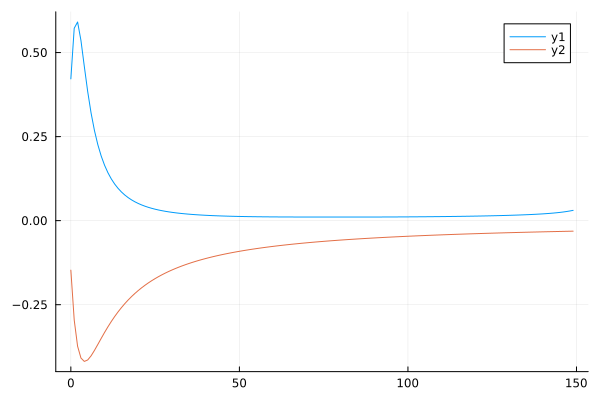

In [23]:
lDGAhelper.Σ_loc

F_m = F_from_χ(lDGAhelper.χDMFT_m, lDGAhelper.gImp[1, :], lDGAhelper.sP, lDGAhelper.mP.β)
F_d = F_from_χ(lDGAhelper.χDMFT_d, lDGAhelper.gImp[1, :], lDGAhelper.sP, lDGAhelper.mP.β)
ΣLoc_m, ΣLoc_d = calc_local_EoM(F_m, F_d, lDGAhelper.gImp[1, :], lDGAhelper.mP, lDGAhelper.sP)
local_EoM_check = abs.(0.5 .* (ΣLoc_m .+ ΣLoc_d) .- lDGAhelper.Σ_loc[axes(ΣLoc_m,1)])
plot(imag(0.5 .* (ΣLoc_m .+ ΣLoc_d)))
plot!(imag(lDGAhelper.Σ_loc[axes(ΣLoc_m,1)]))

In [2]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
se_tmp = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper);
n_str = string(round(mP.n,digits=2))
xr = collect(axes(se_tmp,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr];

In [15]:
LadderDGA.LambdaCorrection.get_λd_min(χm,γm,χd,γd,λ₀, lDGAhelper)

LoadError: ArgumentError: range(490.73384240977595, stop=5.0, length=-4857): negative length

In [16]:
res_dm_tc_eom =  LadderDGA.LambdaCorrection.λdm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM,  λd_min = 0.0, λd_max = 10.0)

LoadError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



In [10]:
λd_min_sample = -3.0# -4.42876699766992 #LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 10.0
Nit = 80
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Plain)
xr_dm_02, fr_dm_02 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Full)
xr_dm_03, fr_dm_03 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.01}, λmax=λd_max);
xr_dm_04, fr_dm_04 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.1}, λmax=λd_max);
#xr_dm_05, fr_dm_05 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=40, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.15}, λmax=λd_max);
#xr_dm_06, fr_dm_06 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=40, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.2}, λmax=λd_max);
xr_dm_07, fr_dm_07 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{1.0}, λmax=λd_max);
xr_dm_08, fr_dm_08 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Wa

In [ ]:
xr_dm_sc_03, fr_dm_sc_03 = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.01}, λmax=λd_max);
println("03 done")
xr_dm_sc_04, fr_dm_sc_04 = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.1}, λmax=λd_max);
println("04 done")
xr_dm_sc_07, fr_dm_sc_07 = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{1.0}, λmax=λd_max);
println("07 done")

In [ ]:
λd_min_sample = -3.0# -4.42876699766992 #LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 10.0
Nit = 20
xr_dm_sc_01, fr_dm_sc_01 = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Plain)
println("01 done")
xr_dm_sc_02, fr_dm_sc_02 = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Full)
println("02 done")
#xr_dm_sc_03, fr_dm_sc_03 = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.01}, λmax=λd_max);
println("03 done")
#xr_dm_sc_04, fr_dm_sc_04 = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.1}, λmax=λd_max);
println("04 done")
#xr_dm_sc_07, fr_dm_sc_07 = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{1.0}, λmax=λd_max);
println("07 done")
xr_dm_sc_08, fr_dm_sc_08 = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);

In [ ]:

p1 = plot(xr_dm_sc_01, fr_dm_sc_01, size=(800,500), linewidth=2, ylims=(-1.5,1.5), xlims=(λd_min_sample,λd_max), legend=:outerright, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p1, xr_dm_sc_02, fr_dm_sc_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p1, xr_dm_sc_03, fr_dm_sc_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
#plot!(p1, xr_dm_sc_04, fr_dm_sc_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p1, xr_dm_sc_07, fr_dm_sc_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
plot!(p1, xr_dm_sc_08, fr_dm_sc_08, label=L"\mathrm{EoM}", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)

p2 = plot(xr_dm_sc_01, fr_dm_sc_01, size=(800,500), linewidth=2, ylims=(-.05,.05), xlims=(1.9599,1.960), legend=:outerright, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p2, xr_dm_sc_02, fr_dm_sc_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p2, xr_dm_sc_03, fr_dm_sc_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p2, xr_dm_sc_04, fr_dm_sc_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p2, xr_dm_sc_07, fr_dm_sc_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
plot!(p2, xr_dm_sc_08, fr_dm_sc_08, label=L"\mathrm{EoM}", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)
p = plot(p1, size=(700,400), left_margin=8mm, bottom_margin=10mm)
savefig("delta_expstep_comparison_n$(n_str)_sc.pdf")
display(p)

In [5]:
p1 = plot(xr_dm_sc_01, fr_dm_sc_01, size=(800,500), linewidth=2, ylims=(-.2,.2), xlims=(λd_min_sample,λd_max), legend=:outerright, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain,sc}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p1, xr_dm_01, fr_dm_01, label=L"\mathrm{plain}", markershape=:auto)
plot!(p1, xr_dm_sc_02, fr_dm_sc_02, label=L"\mathrm{full,sc}", markershape=:auto)
plot!(p1, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p1, xr_dm_sc_08, fr_dm_sc_08, label=L"\mathrm{EoM,sc}", markershape=:auto)
plot!(p1, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)
savefig("cmp_n$(n_str)_sc_nonsc.pdf")
display(p1)

LoadError: UndefVarError: `xr_dm_sc_01` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

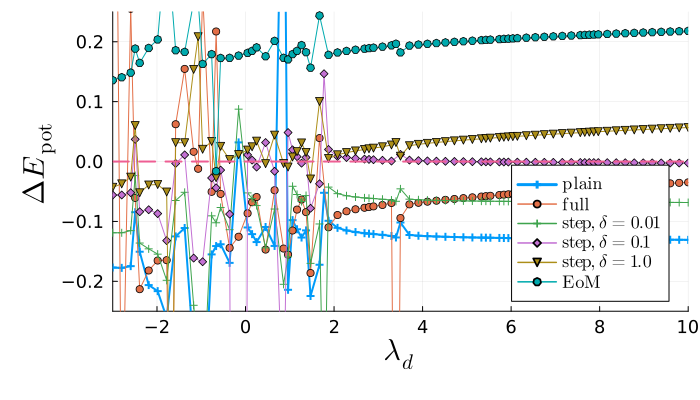

In [17]:

p1 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.25,.25), xlims=(λd_min_sample,λd_max), ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p1, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p1, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p1, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p1, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
plot!(p1, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)

p2 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.05,.05), xlims=(1.9599,1.960), legend=:outerright, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p2, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p2, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p2, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p2, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
plot!(p2, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)
p = plot(p1,  size=(700,400), left_margin=8mm, bottom_margin=10mm)
savefig("delta_expstep_comparison_n$(n_str).pdf")
display(p)

In [ ]:
se_full_list = []
se_eom_list = []
se_plain_list = []
se_delta_list = []
for λd in xr_dm_01  
    rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper, λd=λd)
    λm  = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs, lDGAhelper)
    se_tmp = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper;λm=λm,λd=λd, tc=ΣTail_Full);
    push!(se_full_list,se_tmp)
    se_tmp = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper;λm=λm,λd=λd, tc=ΣTail_Plain);
    push!(se_plain_list,se_tmp)
    se_tmp = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper;λm=λm,λd=λd, tc=ΣTail_EoM);
    push!(se_eom_list,se_tmp)
    se_tmp = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper;λm=λm,λd=λd, tc=ΣTail_ExpStep{0.5});
    push!(se_delta_list,se_tmp)
end

In [ ]:
p = plot(xr_dm_01, map(x->imag(x[1,0]), se_full_list),ylims=(-1,1),markershape=:auto, label="Full", legend=:top,
        xlabel=L"\lambda_\mathrm{d}", ylabel=L"\mathrm{Im} [\Sigma^{i\nu_0}_{\mathbf{k}=\mathbf{0}}]",
        xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr_dm_01, map(x->imag(x[1,0]), se_eom_list),ylims=(-1,1),markershape=:auto, label="EoM")
plot!(xr_dm_01, map(x->imag(x[1,0]), se_plain_list),ylims=(-1,1),markershape=:auto, label="Plain")
plot!(xr_dm_01, map(x->imag(x[1,0]), se_delta_list),ylims=(-1,1),markershape=:auto, label="ExpStep{0.5}")
savefig("im_sig_n$(n_str).pdf")
display(p)

In [ ]:
λd_min_sample = -0.15
λd_max_sample = 0.05
m1b = LadderDGA.LambdaCorrection.get_λ_min(χm)
xr_lm_01, fr_lm_01 = LadderDGA.LambdaCorrection.PPCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=1000, λmin=λd_min_sample, λmax=λd_max_sample, tc=ΣTail_Plain)
p1 = plot(xr_lm_01, fr_lm_01, size=(800,500), linewidth=2, ylims=(-2,2), xlims=(λd_min_sample,λd_max_sample), legend=nothing, ylabel=L"\sum_{\bq}\chi^{\lambda_\mathrm{m},\omega_0}_{\mathrm{m},\mathbf{q}}", xlabel=L"\lambda_m", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, left_margin = 10mm, bottom_margin=10mm)
vline!([m1b], lw=4)
savefig("chim_of_lm_div_n$(n_str).pdf")
display(p1)

In [ ]:
p1 = plot(xr_lm_02, fr_lm_02, size=(800,500),  linewidth=2, ylims=(-.5,1.5), xlims=(-1,3), legend=nothing, ylabel=L"\Delta PP", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, left_margin = 10mm, bottom_margin=10mm)
vline!([m1b], lw=4)
savefig("lm_of_ld_div_n$(n_str).pdf")